<a href="https://colab.research.google.com/github/sischu74/neural_network_constructor/blob/main/Landslide_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center> Welcome to the Landslide Prediction Challenge</h2></center>

A landslide is the movement of a mass of rock, debris, or earth(soil) down a slope. As a common natural hazard, it can lead to significant losses of human lives and properties.


Hong Kong, one of the hilly and densely populated cities in the world, is frequently affected by extreme rainstorms, making it highly susceptible to rain-induced natural terrain landslides

<img src = "https://drive.google.com/uc?export=view&id=1-8sSI75AG3HM89nDJEwo6_KJbAEUXS-r">

The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming.

***Thus, this hack will focus on automating the landslide identification process using artificial intelligence techniques***

This will be achieved by using high-resolution terrain information to perform the terrain-based landslide identification. Other auxiliary data such as the lithology of the surface materials and rainfall intensification factor are also provided.


Table of contents:

1. [Import relevant libraries](#Libraries)
2. [Load files](#Load)
3. [Preview files](#Preview)
4. [Data dictionary](#Dictionary)
5. [Data exploration](#Exploration)
6. [Target distribution](#Target)
7. [Outliers](#Outliers)
8. [Correlations](#Correlations)
9. [Model training](#Model)
10. [Test set predictions](#Predictions)
11. [Creating a submission file](#Submission)
12. [Tips to improve model performance](#Tips)

In [ ]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.2 MB/s 


In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

<a name = "Libraries"></a>
## 1. Import relevant libraries

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<a name = "Load"></a>
## 2. Load files

In [11]:
# Read files to pandas dataframes
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_submission = pd.read_csv('Sample submission.csv')

<a name = "Preview"></a>
## 3. Preview files

In [12]:
# Check the first five rows of the train set
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,

In [13]:
# Check the first five rows of the test set
test.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
0,10865,111,109,109,110,112,117,114,113,112,113,120,120,118,116,115,122,122,122,121,120,122,122,121,121,123,45.83452,36.055030,27.01712,22.98977,27.01712,43.49152,49.490830,42.67464,30.96376,22.98977,27.017120,39.509710,44.56372,43.49152,35.26439,12.604380,11.309930,17.54840,28.30320,38.87666,5.710593,5.710593,8.049467,12.60438,26.56505,240.9454,254.05460,281.30990,315.00000,348.69010,251.56500,250.01690,257.47120,270.00000,315.00000,281.30990,255.96380,246.03750,251.56500,278.130100,296.56510,270.00000,251.56500,248.19860,277.125000,360.00000,180.00000,135.00000,333.43490,306.86990,0.035766,-0.013152,-0.037572,-0.062401,-0.055791,0.027593,0.002834,-0.038738,-0.052596,-0.035428,0.031410,0.010285,-0.030370,-0.047145,-0.030835,0.060269,0.010774,-0.009391,-0.030129,-0.029237,0.088753,0.075792,0.023841,-0.001485,-0.010110,-0.016483,-0.044767,-0.042420,-0.053476,-0.043530,0.008279,0.002710,-0.010917,-0.013603,-0.011500,0.026537,0.017282,-0.005495,-0.016250,-0.016121,0.074879,0.055460,0.042507,0.019065,-0.003870,0.024342,0.042834,0.056148,0.040106,0.021167,9.667106,8.181493,7.782584,8.776177,10.954420,8.896092,11.257830,10.227420,10.278770,8.030625,5.094675,8.138618,10.002860,11.459460,9.746919,1.718303,1.830190,4.348740,5.784863,10.840700,0.664827,0.000081,0.000261,0.846584,4.815838,2.682646,4.814003,6.252043,6.667844,6.602260,2.240095,2.561107,3.066897,5.311826,6.215635,2.774525,2.446323,2.663095,3.096692,4.132727,2.930157,4.044015,3.533233,2.135064,4.028785,4.076646,8.517193,9.857834,5.307338,3.319677,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1.310570,1.310638,1.310684,1.310752,1.310797,1.310388,1.310456,1.310502,1.310570,1.310616,1.310266,1.310335,1.310381,1.310449,1.310495,1.310084,1.310153,1.310199,1.310267,

In [14]:
# Check how the submission file should look like
sample_submission.head()

,Sample_ID,Label
0,10865,0
1,10866,0
2,10867,0
3,10868,0
4,10869,0


<a name = "Dictionary"></a>
## 4. Data Dictionary
<figure>
<img src = "https://drive.google.com/uc?export=view&id=1T_XBSH6ozmhGiDz_nL4bQvvonHUpbCfW" height = "200">
<img src = "https://drive.google.com/uc?export=view&id=13nSrrIowiFPjAgiR--Nd4cHLVwvXFaFj" height = "400">

In [15]:
# Check shape and size of train and test set
train.shape, test.shape, sample_submission.shape

((5765, 227), (5430, 226), (5430, 2))

In [21]:
train

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label,elevation,slope,aspect,placurv,procurv,lsfactor,twi,geology,sdoif
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.13010,113.19860,116.56500,123.69010,135.0000,97.12502,104.03620,110.55600,119.05460,126.8699,105.94540,110.55600,113.96250,116.5650,119.74490,116.5650,119.7449,116.56500,116.56500,128.65980,128.6598,120.9638,120.96380,120.96380,120.96380,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.28169

<a name = "Exploration"></a>
## 5. Data exploration

In [27]:
# Check statistical summaries of the train set
train["elevation"] = train[["1_elevation","2_elevation","3_elevation","4_elevation","5_elevation","6_elevation","7_elevation","8_elevation","9_elevation","10_elevation","11_elevation","12_elevation","13_elevation","14_elevation","15_elevation","16_elevation","17_elevation","18_elevation","19_elevation","20_elevation","21_elevation","22_elevation","23_elevation","24_elevation","25_elevation"]].mean(axis = 1)
train["slope"] = train[["1_slope","2_slope","3_slope","4_slope","5_slope","6_slope","7_slope","8_slope","9_slope","10_slope","11_slope","12_slope","13_slope","14_slope","15_slope","16_slope","17_slope","18_slope","19_slope","20_slope","21_slope","22_slope","23_slope","24_slope","25_slope"]].mean(axis = 1)
train["aspect"] = train[["1_aspect","2_aspect","3_aspect","4_aspect","5_aspect","6_aspect","7_aspect","8_aspect","9_aspect","10_aspect","11_aspect","12_aspect","13_aspect","14_aspect","15_aspect","16_aspect","17_aspect","18_aspect","19_aspect","20_aspect","21_aspect","22_aspect","23_slope","24_aspect","25_aspect"]].mean(axis = 1)
train["placurv"] = train[["1_placurv","2_placurv","3_placurv","4_placurv","5_placurv"]].mean(axis = 1)
train["procurv"] = train[["1_procurv","2_procurv","3_procurv","4_procurv","5_procurv"]].mean(axis = 1)
train["elevation"] = train[["1_elevation","2_elevation","3_elevation","4_elevation","5_elevation"]].mean(axis = 1)
train["lsfactor"] = train[["1_lsfactor","2_lsfactor","3_lsfactor","4_lsfactor","5_lsfactor"]].mean(axis = 1)
train["twi"] = train[["1_twi","2_twi","3_twi","4_twi","5_twi"]].mean(axis = 1)
train["geology"] = train[["1_geology","2_geology","3_geology","4_geology","5_geology"]].mean(axis = 1)
train["sdoif"] = train[["1_sdoif","2_sdoif","3_sdoif","4_sdoif","5_sdoif"]].mean(axis = 1)

train[["elevation", "slope", "aspect","placurv","procurv","elevation","lsfactor", "twi", "geology", "sdoif"]].describe()

,elevation,slope,aspect,placurv,procurv,elevation,lsfactor,twi,geology,sdoif
count,5765.000000,5765.000000,5764.000000,5764.000000,5764.000000,5765.000000,5764.000000,5764.000000,5764.000000,5764.000000
mean,226.215126,28.395813,180.996094,0.000470,-0.000114,226.215126,7.697033,4.531284,3.019813,1.301319
std,158.750523,7.503816,81.442017,0.020719,0.016343,158.750523,3.125389,1.186759,1.110249,0.051338
min,3.200000,8.187094,14.918704,-0.122059,-0.109336,3.200000,0.000565,1.989044,1.000000,1.093334
25%,103.000000,23.276132,112.739271,-0.012311,-0.009112,103.000000,5.587882,3.697136,2.000000,1.286559
50%,192.600000,28.372060,179.026496,0.000836,-0.000487,192.600000,7.587078,4.313796,3.000000,1.308543
75%,313.800000,33.414686,250.613014,0.013371,0.008530,313.800000,9.612692,5.128449,3.000000,1.331419
max,906.200000,59.776352,343.901106,0.100552,0.099163,906.200000,30.225598,13.543147,7.000000,1.370645


 - There is a very high correlation between features extracted from the same location

<Figure size 1440x864 with 0 Axes>

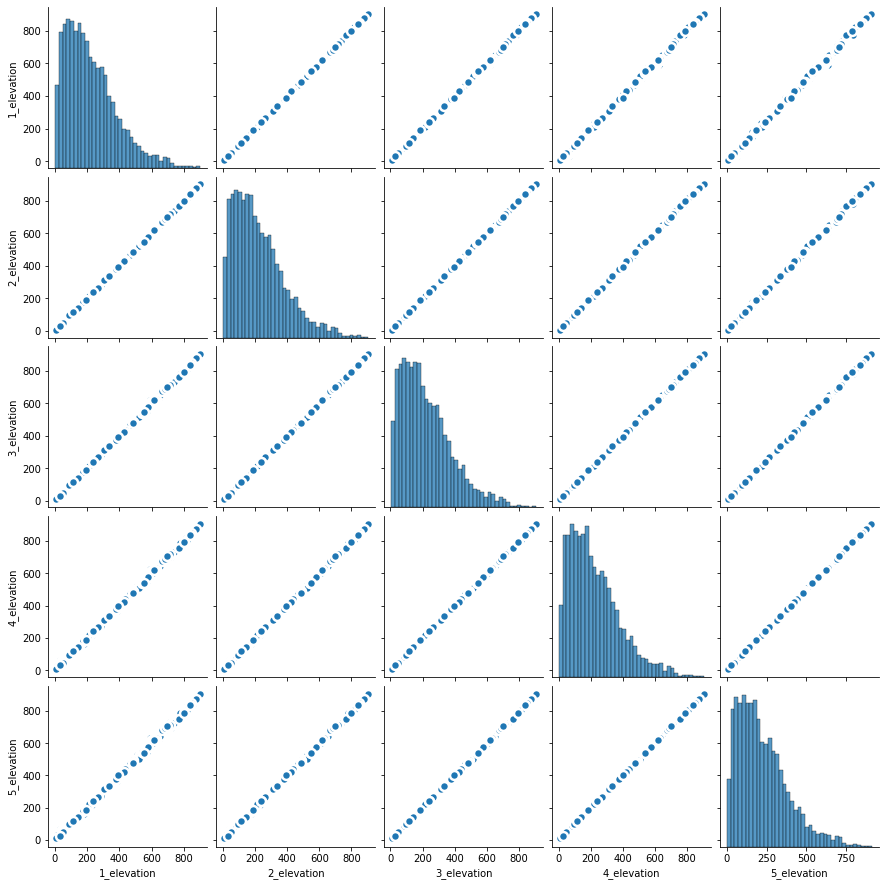

In [17]:
# Elevation correlations
plt.figure(figsize = (20, 12))
sample_elevations = ['1_elevation',	'2_elevation',	'3_elevation',	'4_elevation',	'5_elevation']
sns.pairplot(train[sample_elevations], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [29]:
# Check statistical summaries of the test set
test["elevation"] = test[["1_elevation","2_elevation","3_elevation","4_elevation","5_elevation","6_elevation","7_elevation","8_elevation","9_elevation","10_elevation","11_elevation","12_elevation","13_elevation","14_elevation","15_elevation","16_elevation","17_elevation","18_elevation","19_elevation","20_elevation","21_elevation","22_elevation","23_elevation","24_elevation","25_elevation"]].mean(axis = 1)
test["slope"] = test[["1_slope","2_slope","3_slope","4_slope","5_slope","6_slope","7_slope","8_slope","9_slope","10_slope","11_slope","12_slope","13_slope","14_slope","15_slope","16_slope","17_slope","18_slope","19_slope","20_slope","21_slope","22_slope","23_slope","24_slope","25_slope"]].mean(axis = 1)
test["aspect"] = test[["1_aspect","2_aspect","3_aspect","4_aspect","5_aspect","6_aspect","7_aspect","8_aspect","9_aspect","10_aspect","11_aspect","12_aspect","13_aspect","14_aspect","15_aspect","16_aspect","17_aspect","18_aspect","19_aspect","20_aspect","21_aspect","22_aspect","23_slope","24_aspect","25_aspect"]].mean(axis = 1)
test["procurv"] = test[["1_procurv","2_procurv","3_procurv","4_procurv","5_procurv"]].mean(axis = 1)
test["elevation"] = test[["1_elevation","2_elevation","3_elevation","4_elevation","5_elevation"]].mean(axis = 1)
test["lsfactor"] = test[["1_lsfactor","2_lsfactor","3_lsfactor","4_lsfactor","5_lsfactor"]].mean(axis = 1)
test["twi"] = test[["1_twi","2_twi","3_twi","4_twi","5_twi"]].mean(axis = 1)
test["geology"] = test[["1_geology","2_geology","3_geology","4_geology","5_geology"]].mean(axis = 1)
test["sdoif"] = test[["1_sdoif","2_sdoif","3_sdoif","4_sdoif","5_sdoif"]].mean(axis = 1)

test[["elevation", "slope", "aspect","placurv","procurv","elevation","lsfactor", "twi", "geology", "sdoif"]].describe()



# test.describe()

,elevation,slope,aspect,placurv,procurv,elevation,lsfactor,twi,geology,sdoif
count,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000
mean,226.391013,28.600268,181.647515,0.000654,0.000259,226.391013,7.703862,4.500958,3.026814,1.302709
std,154.131399,7.481361,80.909485,0.020695,0.016343,154.131399,3.074582,1.178877,1.073173,0.050120
min,3.400000,7.746182,15.896006,-0.103174,-0.087109,3.400000,0.000354,1.796458,1.000000,1.093055
25%,105.200000,23.534970,116.224157,-0.012172,-0.008632,105.200000,5.610761,3.700158,3.000000,1.287276
50%,198.500000,28.820861,177.275214,0.000999,-0.000423,198.500000,7.615700,4.274099,3.000000,1.308555
75%,314.450000,33.734805,251.420892,0.013740,0.008915,314.450000,9.603438,5.085880,3.000000,1.332135
max,893.400000,62.282642,342.948264,0.100991,0.082349,893.400000,27.521892,13.175992,7.000000,1.370530


In [30]:
def changeSlope(df):
  if df["slope"] < 35:
    return 0
  elif df["slope"] < 39:
    return 1
  elif df["slope"] < 43:
      return 2
  else:
      return 3

In [31]:
train['slope'] = train.apply(changeSlope, axis=1)
test['slope'] = test.apply(changeSlope, axis=1)

In [32]:
# Check for any missing values
train.isnull().sum().any(), test.isnull().sum().any()

(True, False)

In [33]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

<a name = "Target"></a>
## 6. Target variable distribution

In [34]:
# Check distribution of the target variabe
train.Label.value_counts(normalize = True)

0.0    0.745836
1.0    0.254164
Name: Label, dtype: float64

The dataset is highly imbalanced with the majority class having 75% and the minority class 25%

Some techiques in handling class imbalance include;
 1. Using SMOTE to create synthetic data to reduce imbalanceness
 2. Undersampling the majority class
 3. Oversampling the minority class
 4. Giving more weight to minority class during modelling

<a name = "Outliers"></a>
## 7. Outliers

In [5]:
# Exploring some features for cell 1
explore_cols =  ['elevation', 'aspect', 'slope', 'placurv', 'procurv', 'lsfactor']
explore_cols

['elevation', 'aspect', 'slope', 'placurv', 'procurv', 'lsfactor']

NameError: ignored

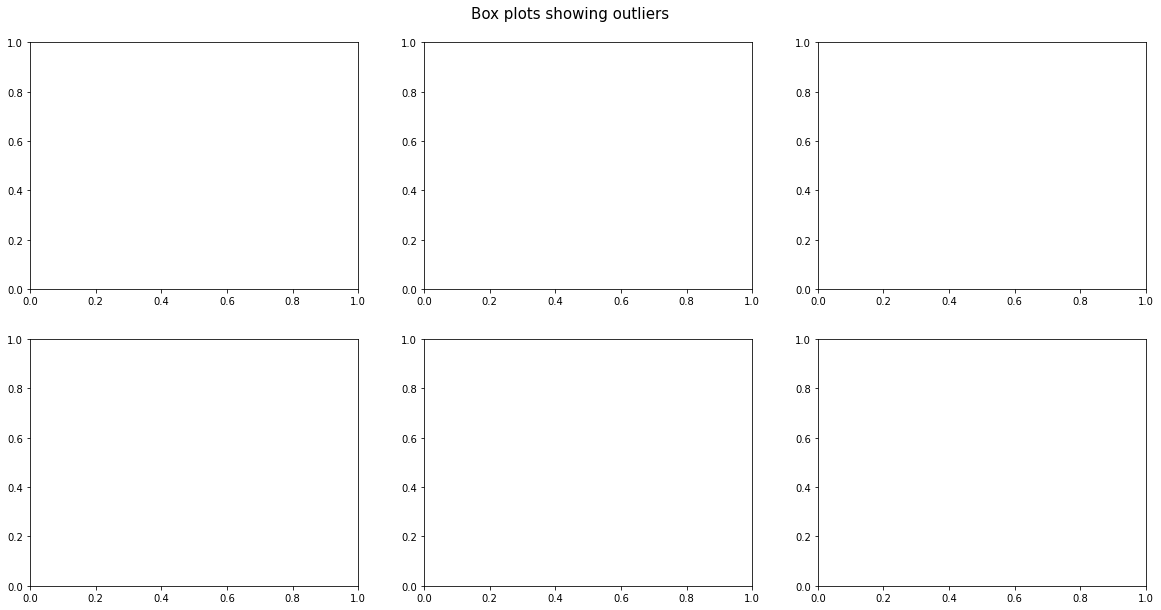

In [6]:
# Plotting boxplots for each of the numerical columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, explore_cols):
  sns.boxplot(train[name], ax = ax)

In [41]:
trainNew = pd.DataFrame()

for i in range(train.shape[0]):
    if (not (train.iloc[i].elevation > 600 or train.iloc[i].slope > 50 or train.iloc[i].placurv < -0.05 or train.iloc[i].placurv > 0.05 or train.iloc[i].procurv < -0.05 or train.iloc[i].procurv > 0.05 or train.iloc[i].lsfactor > 16)):
        trainNew = trainNew.append(train.iloc[i])

trainNew.shape

(5362, 236)

In [42]:
trainNew.shape

(5362, 236)

In [43]:
scaler = MinMaxScaler()
 
train2=pd.DataFrame(scaler.fit_transform(trainNew[trainNew.columns.difference(['Sample_ID', 'Label'])]),
            columns=trainNew.columns.difference(['Sample_ID', 'Label']), index=trainNew.index)
train2["Sample_ID"] = trainNew["Sample_ID"]
train2["Label"] = trainNew["Label"]

In [38]:
train2.shape

(5362, 236)

 Elevation, IsFactor, Placurv, curve and slope have some outliers.
 The aspect feature has no outliers.
 
 Some of the techniques you can use to handle outliers include:
  1. Log transformations, scaling, box-cox transformations...
  2. Dropping the outliers
  3. Replacing the outliers with mean, median, mode or any other aggregates

<a name = "Correlations"></a>
## 8. Correlations

<Figure size 1440x864 with 0 Axes>

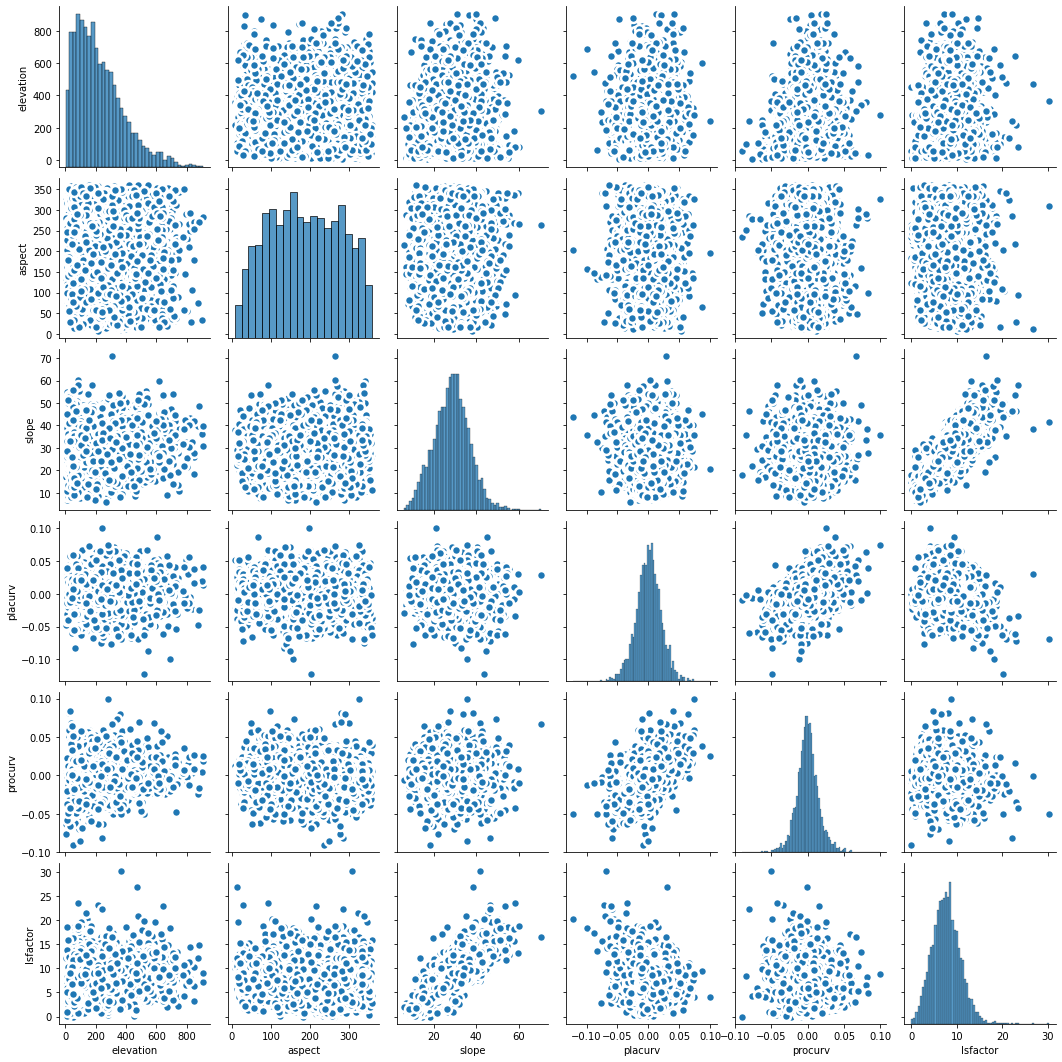

In [ ]:
# Type of correlations 
plt.figure(figsize = (20, 12))
sns.pairplot(train[explore_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- There is no correlation for most of the features, how can you capture this information for modelling...
- Which information can you derive from this correlations

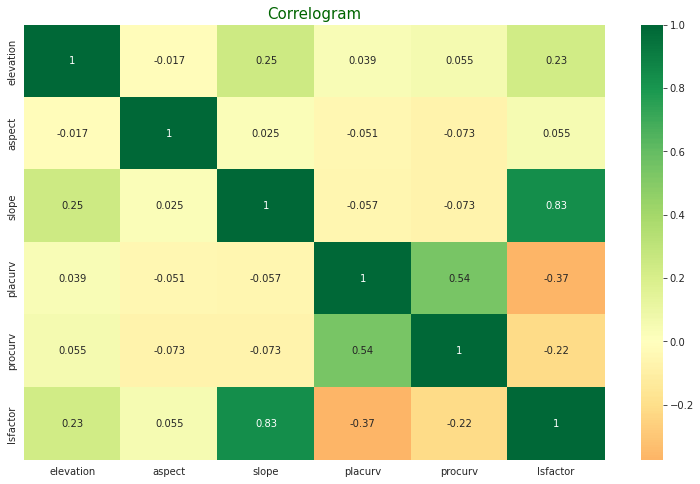

In [ ]:
# Quantify correlations
corr = train[explore_cols].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

 - There is a strong positive correlation of approximately 0.8 between slope and IsFactor
 - There is some negative correlation between IsFactor and placurv
 - The IsFactor variable is correlated most of the other features, why is this?

<a name = "Model"></a>
## 9. Model training

In [46]:
train2[:-1]

,10_aspect,10_elevation,10_geology,10_lsfactor,10_placurv,10_procurv,10_sdoif,10_slope,10_twi,11_aspect,11_elevation,11_geology,11_lsfactor,11_placurv,11_procurv,11_sdoif,11_slope,11_twi,12_aspect,12_elevation,12_geology,12_lsfactor,12_placurv,12_procurv,12_sdoif,12_slope,12_twi,13_aspect,13_elevation,13_geology,13_lsfactor,13_placurv,13_procurv,13_sdoif,13_slope,13_twi,14_aspect,14_elevation,14_geology,14_lsfactor,14_placurv,14_procurv,14_sdoif,14_slope,14_twi,15_aspect,15_elevation,15_geology,15_lsfactor,15_placurv,15_procurv,15_sdoif,15_slope,15_twi,16_aspect,16_elevation,16_geology,16_lsfactor,16_placurv,16_procurv,16_sdoif,16_slope,16_twi,17_aspect,17_elevation,17_geology,17_lsfactor,17_placurv,17_procurv,17_sdoif,17_slope,17_twi,18_aspect,18_elevation,18_geology,18_lsfactor,18_placurv,18_procurv,18_sdoif,18_slope,18_twi,19_aspect,19_elevation,19_geology,19_lsfactor,19_placurv,19_procurv,19_sdoif,19_slope,19_twi,1_aspect,1_elevation,1_geology,1_lsfactor,1_placurv,1_procurv,1_sdoif,1_slope,1_twi,20_aspect,20_elevation,20_geology,20_lsfactor,20_placurv,20_procurv,20_sdoif,20_slope,20_twi,21_aspect,21_elevation,21_geology,21_lsfactor,21_placurv,21_procurv,21_sdoif,21_slope,21_twi,22_aspect,22_elevation,22_geology,22_lsfactor,22_placurv,22_procurv,22_sdoif,22_slope,22_twi,23_aspect,23_elevation,23_geology,23_lsfactor,23_placurv,23_procurv,23_sdoif,23_slope,23_twi,24_aspect,24_elevation,24_geology,24_lsfactor,24_placurv,24_procurv,24_sdoif,24_slope,24_twi,25_aspect,25_elevation,25_geology,25_lsfactor,25_placurv,25_procurv,25_sdoif,25_slope,25_twi,2_aspect,2_elevation,2_geology,2_lsfactor,2_placurv,2_procurv,2_sdoif,2_slope,2_twi,3_aspect,3_elevation,3_geology,3_lsfactor,3_placurv,3_procurv,3_sdoif,3_slope,3_twi,4_aspect,4_elevation,4_geology,4_lsfactor,4_placurv,4_procurv,4_sdoif,4_slope,4_twi,5_aspect,5_elevation,5_geology,5_lsfactor,5_placurv,5_procurv,5_sdoif,5_slope,5_twi,6_aspect,6_elevation,6_geology,6_lsfactor,6_placurv,6_procurv,6_sdoif,6_slope,6_twi,7_aspect,7_elevation,7_geology,7_lsfactor,7_placurv,7_procurv,7_sdoif,7_slope,7_twi,8_aspect,8_elevation,8_geology,8_lsfactor,8_placurv,8_procurv,8_sdoif,8_slope,8_twi,9_aspect,9_elevation,9_geology,9_lsfactor,9_placurv,9_procurv,9_sdoif,9_slope,9_twi,aspect,elevation,geology,lsfactor,placurv,procurv,sdoif,slope,twi,Sample_ID,Label
0,0.343732,0.195688,0.333333,0.354977,0.599082,0.609586,0.679364,0.593192,0.103358,0.280044,0.198675,0.333333,0.202918,0.560275,0.470089,0.680010,0.493045,0.141397,0.297808,0.197674,0.333333,0.211027,0.558007,0.595723,0.679898,0.547653,0.120423,0.307398,0.193656,0.333333,0.280873,0.503853,0.626340,0.679744,0.661904,0.110869,0.312892,0.191987,0.333333,0.224128,0.456604,0.558498,0.679638,0.524538,0.109218,0.320660,0.190397,0.333333,0.209386,0.441869,0.449641,0.679481,0.494562,0.133236,0.317007,0.192434,0.333333,0.236157,0.592781,0.500410,0.680163,0.415833,0.146871,0.323675,0.190083,0.333333,0.206027,0.596872,0.466488,0.680057,0.568046,0.129230,0.316551,0.186047,0.333333,0.162200,0.554436,0.415261,0.679897,0.504215,0.156178,0.316029,0.186047,0.333333,0.275935,0.601370,0.498868,0.679791,0.496709,0.112612,0.262829,0.212375,0.333333,0.284627,0.599940,0.547685,0.679778,0.499050,0.109916,0.350507,0.185430,0.333333,0.226660,0.585020,0.387457,0.679634,0.471975,0.151585,0.347980,0.185550,0.333333,0.181584,0.561158,0.438806,0.680283,0.486087,0.154224,0.327107,0.183168,0.333333,0.235163,0.571887,0.486138,0.680175,0.439571,0.183405,0.327107,0.182119,0.333333,0.135914,0.585013,0.535889,0.680015,0.374127,0.181631,0.330093,0.180165,0.333333,0.218688,0.461719,0.431426,0.679910,0.375946,0.166262,0.328900,0.181518,0.333333,0.178942,0.501855,0.421572,0.679750,0.427425,0.130714,0.303390,0.212121,0.333333,0.243969,0.729912,0.467567,0.679681,0.545765,0.119159,0.315427,0.207420,0.333333,0.219304,0.706367,0.694368,0.679473,0.504215,0.113792,0.336555,0.207358,0.333333,2.241189e-01,0.681385,0.644070,0.679362,0.518654,0.102913,0.366619,0.202658,0.333333,0.311413,0.542013,0.

In [47]:
# Select main columns to be used in training
train2 = train2[:-1]
main_cols = train2.columns.difference(['Sample_ID', 'Label','elevation', 'aspect', '1_slope', '2_slope','3_slope','4_slope','5_slope','placurv', 'procurv', 'lsfactor'])
X = train2[main_cols]
y = train2["Label"]

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2022)

sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_resample(X, y)

X_train_new.shape

(7942, 224)

In [48]:
import xgboost as xgb
from xgboost import XGBRegressor
dataMat = xgb.DMatrix(data = X_train_new, label = y_train_new)

params = {"objective":"binary:logistic", 'metrics':'Logloss', 'colsample_bytree': 0.3,'learning_rate': 0.18,
                'max_depth': 7, 'alpha': 4}

# cv_results = xgb.cv(dtrain=dataMat, params=params, nfold=5,
#                     num_boost_round=50,early_stopping_rounds=10,seed=123)

# cv_results
model = xgb.XGBRegressor(objective='binary:logistic', colsample_bytree = 0.3, max_depth = 7, seed=37, reg_alpha = 4, metrics = "Logloss", learning_rate = 0.18)
model.fit(X_train_new, y_train_new)

XGBRegressor(colsample_bytree=0.3, learning_rate=0.18, max_depth=7,
             metrics='Logloss', objective='binary:logistic', reg_alpha=4,
             seed=37)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_new,y_train_new,test_size=0.3, random_state=2022)

model = xgb.XGBRegressor(objective='binary:logistic', max_depth = 7, maxseed=37, reg_alpha = 6, metrics = "Logloss", learning_rate = 0.18)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
asign = lambda x: 1 if x >= 0.5 else 0
y_pred = list(map(asign, y_pred))



# print(f'RandomForest F1 score on the X_test is: {f1_score(y_pred, y_test)}\n')

RandomForest F1 score on the X_test is: 0.8916967509025271



In [261]:
# learn about slope of wronlgy classified points

wrong = pd.DataFrame()
was1 = 0
was0 = 0
for k in range((X_test.shape[0])):
  if int(y_test.iloc[k]) != int(y_pred[k]):
    if y_test.iloc[k] == 1: was1 += 1
    else: was0 += 1
    wrong = wrong.append(X_test.iloc[k])

print(was1, " ", was0)
wrong["slope"].describe()

79   161


count    240.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: slope, dtype: float64

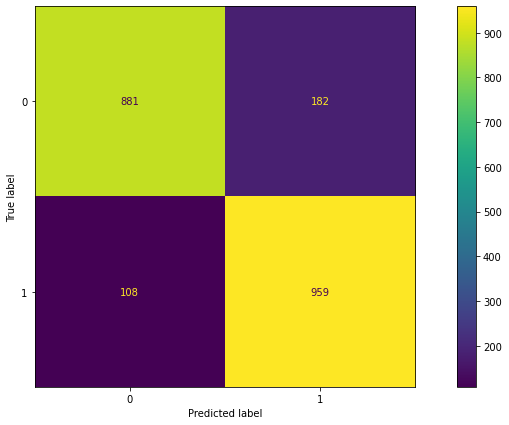

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

 - True positives - 442
 - True negatives - 2287
 - False positives - 128
 - False negatives - 403

 Precision  = TP / (TP + FP) = 442 / (442 + 128) = 0.775438596491228

 Recall = TP / (TP + FN) = 442 / (442 + 403) = 0.5230769230769231

 F1 score = harmonic mean between Precision and Recall

 F1 score = (2 * Precision * Recall) / (Precision + Recall)

 F1 score = (2 * 0.775438596491228 * 0.5230769230769231) / (0.775438596491228 + 0.5230769230769231) = 0.6247349823321554

<a name = "Predictions"></a>
## 10. Test set predictions

In [49]:
# scale the data

scaler = MinMaxScaler()

testSet =pd.DataFrame(scaler.fit_transform(test[test.columns.difference(['Sample_ID', 'Label','elevation', 'aspect','1_slope', '2_slope','3_slope','4_slope','5_slope','placurv', 'procurv', 'lsfactor'])]),
            columns=test.columns.difference(['Sample_ID', 'Label','elevation', 'aspect', '1_slope', '2_slope','3_slope','4_slope','5_slope','placurv', 'procurv', 'lsfactor']), index=test.index)
testSet["Sample_ID"] = test["Sample_ID"]

In [50]:
# Make prediction on the test set
test_df = testSet[main_cols]
predictions = model.predict(test_df)

asign = lambda x: 1 if x >= 0.5 else 0
predictions = list(map(asign, predictions))

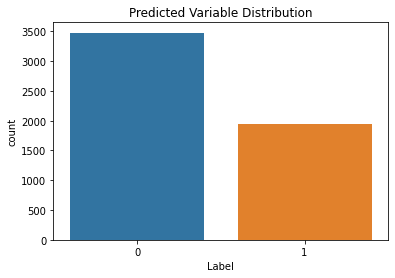

In [51]:
# Create a submission file
sub_file = pd.DataFrame({'Sample_ID': test.Sample_ID, 'Label': predictions})

# Check the distribution of your predictions
sns.countplot(x = sub_file.Label)
plt.title('Predicted Variable Distribution');

<a name = "Submission"></a>
## 11. Creating a submission file

In [52]:
# Create a csv file and upload to zindi
sub_file.to_csv('submission.csv', index = False)
sub_file.head()

,Sample_ID,Label
0,10865,1
1,10866,0
2,10867,0
3,10868,1
4,10869,1


<a name = "Tips"></a>
## 12. Tips to improve model performance
 - Use cross-validation techniques
 - Feature engineering
 - Handle the class imbalance of the target variable
 - Try different modelling techniques - Stacking classifier, Voting classifiers, ensembling...
 - Data transformations
 - Feature Selection techniques such as RFE, Tree-based feature importance...
 - Domain Knowledge, do research on how the provided features affect landslides, soil topology...

#                       ::GOOD LUCK AND HAPPY HACKING 😊


